In [1]:
import torch
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_iter(s):
    return int(s.split('/')[-1].split('_')[0])

In [3]:
def to_numpy(para):
    return para.cpu().numpy()

In [4]:
def dice_score(mask1,mask2):
    return np.sum(mask1[mask2==1])*2.0 / (np.sum(mask1) + np.sum(mask2))

In [5]:
def Reimagine(mask): 
    mask = to_numpy(mask)
    mask = mask.flatten()
    if len(mask)>576:
        mask = np.reshape(mask,(1024,-1))
    else:
        mask = np.reshape(mask,(32,-1))
    #print(mask)
    return mask


In [6]:
def load_masks(masks_dir):
    dump = []
    paths = os.listdir(masks_dir)
    for path in paths:
        if 'best' in path and not '100' in path:
            pathlist = path.split('_')
            pathlist.remove('best')
            mask_path = masks_dir+'_'.join(pathlist)
            masksize=get_iter(mask_path)
            dump1 = torch.load(mask_path, "cpu")
            dump.append((masksize,dump1['mask']))
    return dump
            

In [7]:
def combine_masks(total_masks):
    combined_masks = {}
    for (_,maskarab),(name,maskban) in zip(total_masks[0][1].items(),total_masks[1][1].items()):
        combined_masks[name] = [maskarab,maskban]
    return combined_masks

            

In [8]:
total_masks = load_masks('/home/azhar/masks/masks_mtl/')#bangla
#total_masks = load_masks('/home/azhar/masks/0/')#arab
total_masks[0] = list(total_masks[0])#arab
total_masks[1] = list(total_masks[1])#ban
#total_masks[1]

In [9]:
cm = combine_masks(total_masks)
#cm

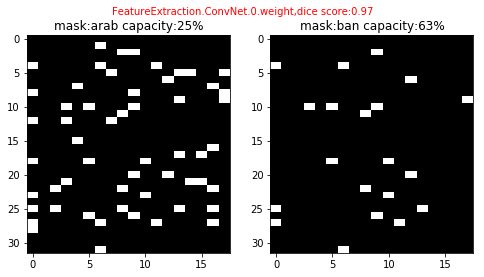

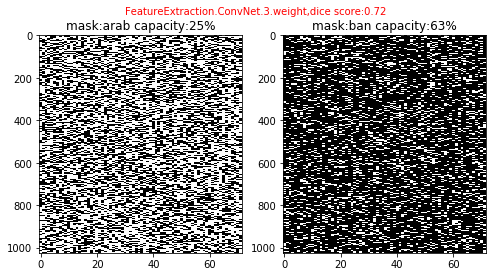

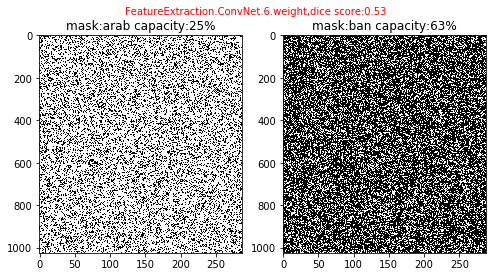

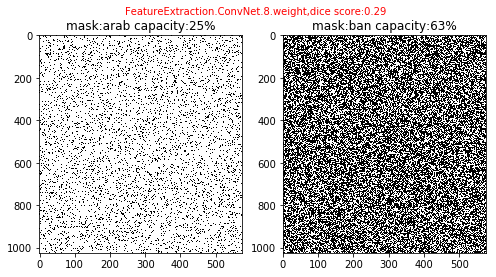

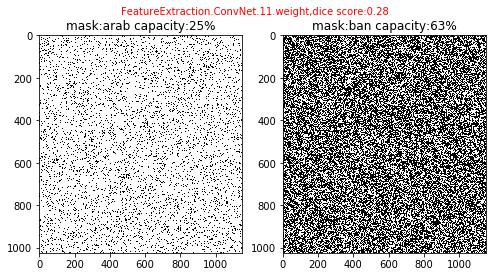

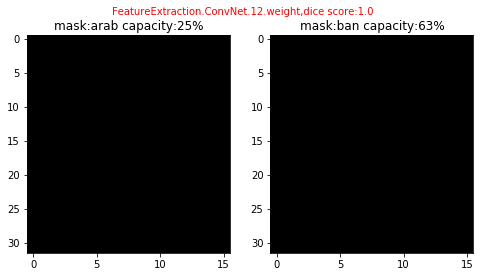

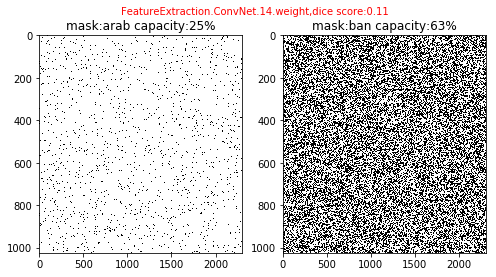

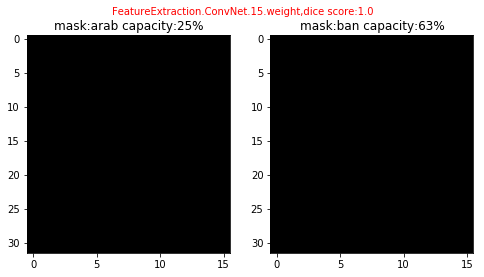

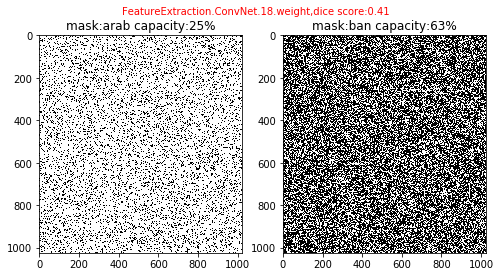

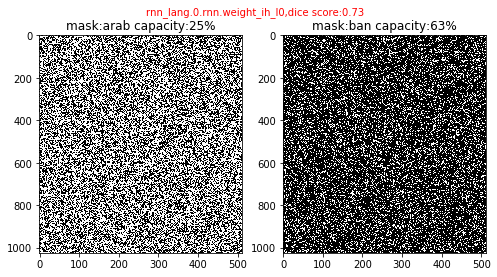

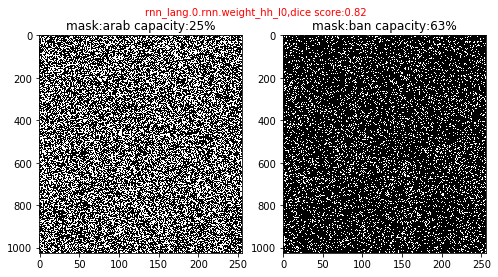

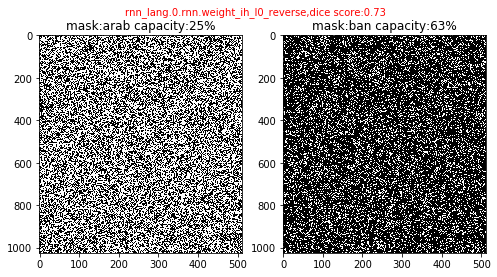

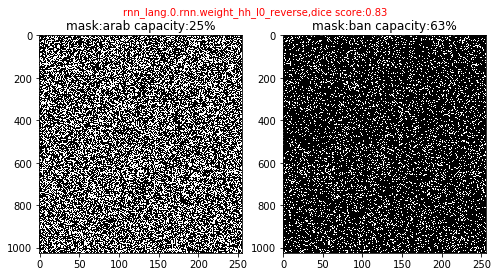

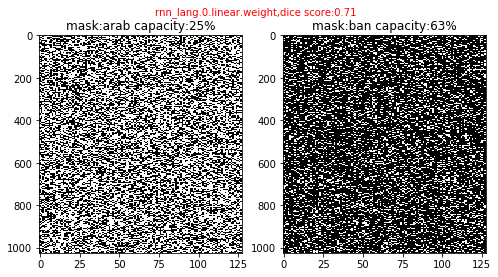

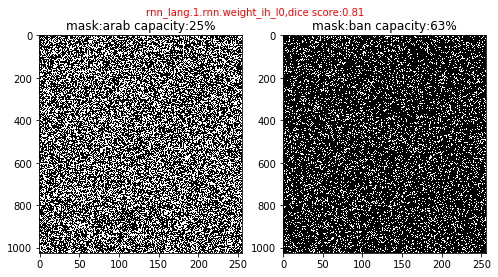

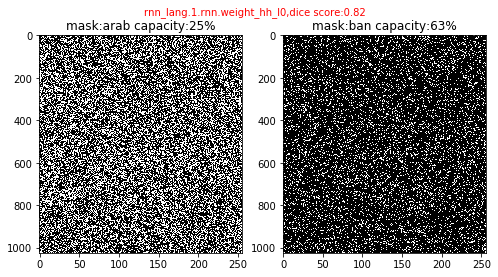

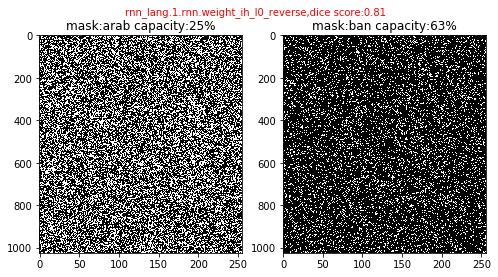

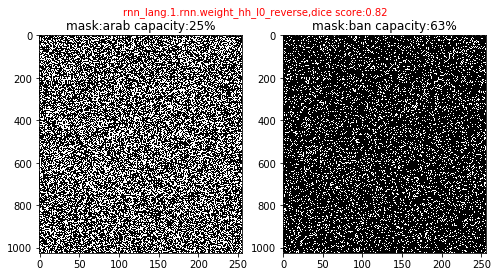

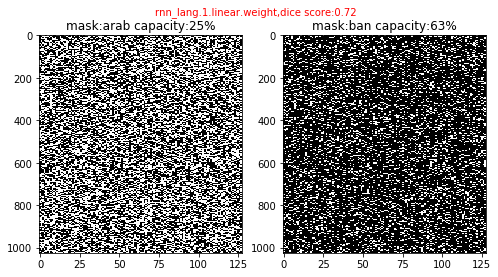

In [10]:
for name,masks in cm.items():
    mask1 = Reimagine(masks[0])
    mask1 = 1*mask1
    mask1_d = -1*(mask1-1)
    mask2 = Reimagine(masks[1])
    mask2 = 1*mask2
    mask2_d = -1*(mask2-1)
    ds = np.round(dice_score(mask1_d,mask2_d),2)
    fig=plt.figure(figsize=(8,4))
    fig.suptitle(name+',dice score:'+str(ds), fontsize=10,color='red')
    ax = fig.add_subplot(121)
    ax.set_title('mask:arab capacity:25%')
    ax.imshow(mask1, aspect='auto', cmap=plt.cm.gray, interpolation='nearest')
    ax = fig.add_subplot(122)
    ax.set_title('mask:ban capacity:63%')
    ax.imshow(mask2, aspect='auto', cmap=plt.cm.gray, interpolation='nearest')
    
    
    
    